<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_1_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,34.039569,98.129032,-0.039551,142.129050,142.170539,-0.041489
1,0.0,1.0,36.408337,53.836763,0.036797,100.281897,100.253050,0.028847
2,0.0,2.0,83.217118,55.293551,-0.002400,148.508269,148.506500,0.001769
3,0.0,3.0,32.037111,45.495794,0.075198,87.608103,87.543212,0.064891
4,0.0,4.0,44.023048,83.052717,-0.016682,137.059084,137.077417,-0.018333
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.778575,58.357507,-0.027221,150.108861,150.149185,-0.040324
29996,999.0,26.0,79.636371,83.413491,0.013101,173.062964,173.061698,0.001265
29997,999.0,27.0,99.075848,34.420252,0.036074,143.532174,143.518538,0.013636
29998,999.0,28.0,66.487065,52.652562,-0.050272,129.089355,129.144614,-0.055259


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    34.039569  98.129032 -0.039551  142.129050  142.170539 -0.041489
      1.0    36.408337  53.836763  0.036797  100.281897  100.253050  0.028847
      2.0    83.217118  55.293551 -0.002400  148.508269  148.506500  0.001769
      3.0    32.037111  45.495794  0.075198   87.608103   87.543212  0.064891
      4.0    44.023048  83.052717 -0.016682  137.059084  137.077417 -0.018333
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.778575  58.357507 -0.027221  150.108861  150.149185 -0.040324
      26.0   79.636371  83.413491  0.013101  173.062964  173.061698  0.001265
      27.0   99.075848  34.420252  0.036074  143.532174  143.518538  0.013636
      28.0   66.487065  52.652562 -0.050272  129.089355  129.144614 -0.055259
      29.0   32.776912  77.566954 -0.007810  120.336057  120.330771  0.005286

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    34.039569  98.129032 -0.039551  142.129050  142.170539 -0.041489
      1.0    36.408337  53.836763  0.036797  100.281897  100.253050  0.028847
      2.0    83.217118  55.293551 -0.002400  148.508269  148.506500  0.001769
      3.0    32.037111  45.495794  0.075198   87.608103   87.543212  0.064891
      4.0    44.023048  83.052717 -0.016682  137.059084  137.077417 -0.018333
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.778575  58.357507 -0.027221  150.108861  150.149185 -0.040324
      26.0   79.636371  83.413491  0.013101  173.062964  173.061698  0.001265
      27.0   99.075848  34.420252  0.036074  143.532174  143.518538  0.013636
      28.0   66.487065  52.652562 -0.050272  129.089355  129.144614 -0.055259
      29.0   32.776912  77.566954 -0.007810  120.336057  120.330771  0.005286

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,34.039569,98.129032,-0.039551,142.129050,142.170539,-0.041489
1,0.0,1.0,36.408337,53.836763,0.036797,100.281897,100.253050,0.028847
2,0.0,2.0,83.217118,55.293551,-0.002400,148.508269,148.506500,0.001769
3,0.0,3.0,32.037111,45.495794,0.075198,87.608103,87.543212,0.064891
4,0.0,4.0,44.023048,83.052717,-0.016682,137.059084,137.077417,-0.018333
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.778575,58.357507,-0.027221,150.108861,150.149185,-0.040324
29996,999.0,26.0,79.636371,83.413491,0.013101,173.062964,173.061698,0.001265
29997,999.0,27.0,99.075848,34.420252,0.036074,143.532174,143.518538,0.013636
29998,999.0,28.0,66.487065,52.652562,-0.050272,129.089355,129.144614,-0.055259


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    34.039569  98.129032 -0.039551  142.129050  142.170539 -0.041489
      1.0    36.408337  53.836763  0.036797  100.281897  100.253050  0.028847
      2.0    83.217118  55.293551 -0.002400  148.508269  148.506500  0.001769
      3.0    32.037111  45.495794  0.075198   87.608103   87.543212  0.064891
      4.0    44.023048  83.052717 -0.016682  137.059084  137.077417 -0.018333
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.778575  58.357507 -0.027221  150.108861  150.149185 -0.040324
      26.0   79.636371  83.413491  0.013101  173.062964  173.061698  0.001265
      27.0   99.075848  34.420252  0.036074  143.532174  143.518538  0.013636
      28.0   66.487065  52.652562 -0.050272  129.089355  129.144614 -0.055259
      29.0   32.776912  77.566954 -0.007810  120.336057  120.330771  0.005286

[30000 rows x 6 columns]

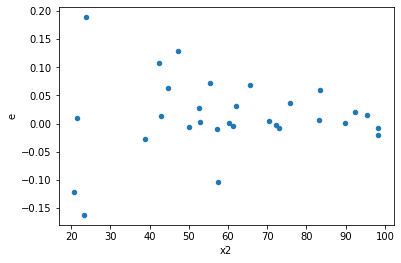

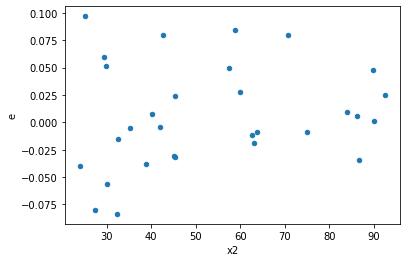

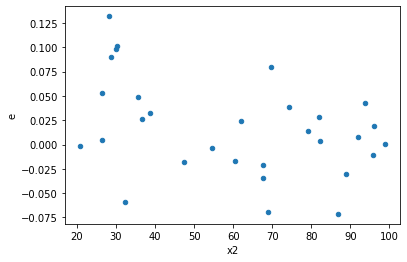

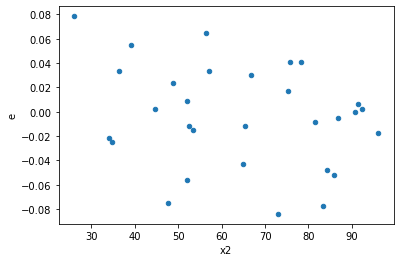

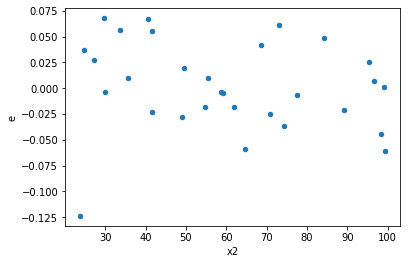

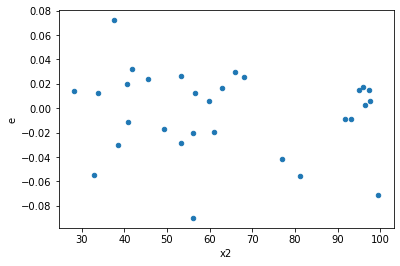

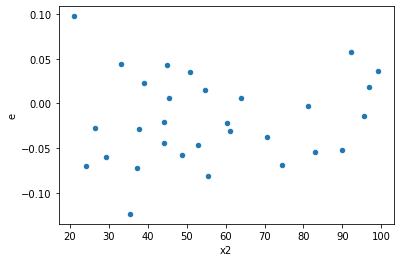

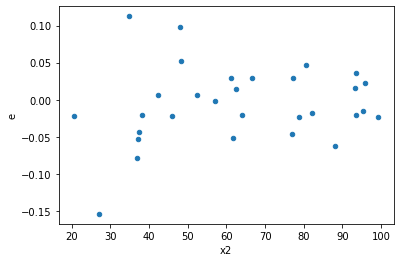

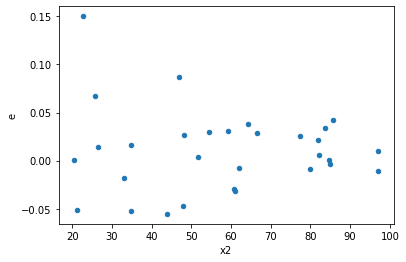

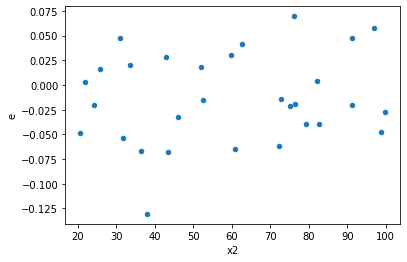

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,15.0,11.0,0.019443108645035498,0.019143780289802355,0.0012962072430023665,0.001740343662709305,1.3426430627545318,0.6305304428705973,0.6847347785647013,0.31526522143529867,Reject005=1 : Homoscedasticity
1.0,17.0,9.0,0.02024213353809459,0.0503745198278731,0.0011907137375349757,0.005597168869763678,4.700683878352641,0.022937848955300932,0.9885310755223495,0.011468924477650466,Reject005=0 : Heteroscedasticity
2.0,8.0,18.0,0.006818261519546149,0.04959049581730251,0.0008522826899432686,0.0027550275454056947,3.232527866533439,0.03683345179254904,0.9815832741037255,0.01841672589627452,Reject005=0 : Heteroscedasticity
4.0,15.0,11.0,0.01515810890781116,0.04709185457019497,0.0010105405938540773,0.004281077688199543,4.236423271104865,0.020268519856619927,0.98986574007169,0.010134259928309963,Reject005=0 : Heteroscedasticity
5.0,20.0,6.0,0.037405476558370954,0.04659514699214664,0.0018702738279185477,0.00776585783202444,4.152257127325128,0.08499855579799531,0.9575007221010023,0.042499277898997656,Reject005=1 : Homoscedasticity
6.0,13.0,13.0,0.007090351459113219,0.009387648535418128,0.0005454116507010168,0.0007221268104167791,1.3240032725531816,0.6202159681430595,0.6898920159284703,0.31010798407152973,Reject005=1 : Homoscedasticity
12.0,18.0,8.0,0.011891583183757529,0.029484152540812023,0.0006606435102087516,0.003685519067601503,5.578680499619144,0.018124391399170436,0.9909378043004148,0.009062195699585218,Reject005=0 : Heteroscedasticity
13.0,16.0,10.0,0.025481660074101114,0.01688956393518152,0.0015926037546313196,0.0016889563935181518,1.060500070156583,0.9549613425505212,0.5225193287247394,0.4774806712752606,Reject005=1 : Homoscedasticity
17.0,7.0,19.0,0.006083682755490239,0.06241336896439263,0.0008690975364986055,0.003284914156020665,3.779684118372755,0.01964769268607669,0.9901761536569617,0.009823846343038345,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,15.0,11.0,0.019443108645035498,0.019143780289802355,0.0012962072430023665,0.001740343662709305,1.3426430627545318,0.6305304428705973,Reject005=1 : Homoscedasticity
1.0,17.0,9.0,0.02024213353809459,0.0503745198278731,0.0011907137375349757,0.005597168869763678,4.700683878352641,0.022937848955300932,Reject005=0 : Heteroscedasticity
2.0,8.0,18.0,0.006818261519546149,0.04959049581730251,0.0008522826899432686,0.0027550275454056947,3.232527866533439,0.03683345179254904,Reject005=0 : Heteroscedasticity
3.0,16.0,10.0,0.01546636187459667,0.006338802357731824,0.0009666476171622919,0.0006338802357731824,0.6557510974206016,0.4357826363131867,Reject005=1 : Homoscedasticity
4.0,15.0,11.0,0.01515810890781116,0.04709185457019497,0.0010105405938540773,0.004281077688199543,4.236423271104865,0.020268519856619927,Reject005=0 : Heteroscedasticity
5.0,20.0,6.0,0.037405476558370954,0.04659514699214664,0.0018702738279185477,0.00776585783202444,4.152257127325128,0.08499855579799531,Reject005=1 : Homoscedasticity
6.0,13.0,13.0,0.007090351459113219,0.009387648535418128,0.0005454116507010168,0.0007221268104167791,1.3240032725531816,0.6202159681430595,Reject005=1 : Homoscedasticity
7.0,10.0,16.0,0.016706490127134172,0.01569131964875035,0.0016706490127134173,0.000980707478046897,0.5870218523363334,0.3958349718889076,Reject005=1 : Homoscedasticity
8.0,7.0,19.0,0.006029015985411909,0.006117644196637943,0.000861287997915987,0.0003219812735072602,0.37383694453695077,0.1873478282907797,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      642
Reject005=0 : Heteroscedasticity    358
Name: Result_test, dtype: int64